## 0. Goal
Run UMAP directly on spectrograms from different preprocessing choices. <br>
Then use Hopkins metrics and Silloutte score to quantify clusterability. <br>
Differ from v1: vary the nperseg and noverlap spectrogramming parameters, base is Goffinet no mel, no time stretch

In [9]:
import os, sys, importlib, librosa, glob, h5py, tqdm
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import Parallel, delayed
import random
import umap, hdbscan
from collections import Counter
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score

plt.rcParams['pdf.fonttype'] = 42 

In [10]:
# import my utility script
cluster_script_path = '/home/zz367/ProjectsU/EphysMONAO/Jupyter/MatlabCodes/ZZ_callClustering/'
sys.path.insert(1, cluster_script_path)
import vae_goffinet, hopkins
importlib.reload(vae_goffinet)

<module 'vae_goffinet' from '/home/zz367/ProjectsU/EphysMONAO/Jupyter/MatlabCodes/ZZ_callClustering/vae_goffinet.py'>

In [11]:
# create a custom colormap for spectrogram
jet = plt.get_cmap('jet', 255)
# Extract jet colors and prepend black at the beginning
jet_colors = jet(np.linspace(0, 1, 255))
custom_colors = np.vstack([[0, 0, 0, 1], jet_colors])  # Black for 0, then jet
custom_cmap = ListedColormap(custom_colors)

## 1. Inputs

In [12]:
fd_z4 = '/mnt/z4'
fd_data = os.path.join(fd_z4, 'zz367', 'EphysMONAO', 'Analyzed', 'vaeWav')
birdIDs = ['pair5RigCCU29', 'pair4RigACU68', 'pair4RigBCU53', 'pair2RigBCU25']
# color limits when calculating spectrograms, depending on the audio amplitude, may differ between birds
clims = [[1.5,7], [1.5,7], [1.5,8.5], [1.5,8]]
# what syllable to analyze
syl = ['v']
sylStr = ''.join(syl)
# the default color list
col_list = ['#e41a1c','#a65628','#4daf4a','#984ea3','#ff7f00','#f781bf','#377eb8','#737373']

In [13]:
# what preprocessed spectrogram datasets?
nn = [[256, 128], [256, 176], [256, 216], [256, 236],
      [512, 256], [512, 432], [128, 64],  [128, 108]]
run_names = []
for ni in range(len(nn)):
    run_names.append(f'spec_goffinet_nn_{nn[ni][0]}_{nn[ni][1]}')
print(run_names)

['spec_goffinet_nn_256_128', 'spec_goffinet_nn_256_176', 'spec_goffinet_nn_256_216', 'spec_goffinet_nn_256_236', 'spec_goffinet_nn_512_256', 'spec_goffinet_nn_512_432', 'spec_goffinet_nn_128_64', 'spec_goffinet_nn_128_108']


In [14]:
# paramteres for UMAP and HDBSCAN
param_umap = {'n_components':2, 'n_neighbors':25, 'min_dist':0, 'metric':'euclidean'}
param_hdbscan = {'min_cluster_size_frac':0.05, 'min_samples': 20}

## 2. UMAP, then HDBSCAN on each dataset

In [15]:
# save metrics in a master dataframe
metrics = pd.DataFrame()

Processing for pair5RigCCU29 spec_goffinet_nn_256_128...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:01:22 2025 Construct fuzzy simplicial set
Sat Jun  7 12:01:23 2025 Finding Nearest Neighbors
Sat Jun  7 12:01:23 2025 Building RP forest with 13 trees
Sat Jun  7 12:01:37 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:02:35 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:02:37 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:02:47 2025 Finished embedding
The fraction that are not clustered: 0.1061
Total number of clusters: 6
Hopkins metric on UMAP: 0.9796
Silhouette score on HDBSCAN: 0.4011
Processing for pair5RigCCU29 spec_goffinet_nn_256_176...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:03:27 2025 Construct fuzzy simplicial set
Sat Jun  7 12:03:28 2025 Finding Nearest Neighbors
Sat Jun  7 12:03:28 2025 Building RP forest with 13 trees
Sat Jun  7 12:03:40 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:04:32 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:04:32 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:04:42 2025 Finished embedding
The fraction that are not clustered: 0.0626
Total number of clusters: 5
Hopkins metric on UMAP: 0.9805
Silhouette score on HDBSCAN: 0.4403
Processing for pair5RigCCU29 spec_goffinet_nn_256_216...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:05:21 2025 Construct fuzzy simplicial set
Sat Jun  7 12:05:22 2025 Finding Nearest Neighbors
Sat Jun  7 12:05:22 2025 Building RP forest with 13 trees
Sat Jun  7 12:05:32 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:06:24 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:06:25 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:06:35 2025 Finished embedding
The fraction that are not clustered: 0.1230
Total number of clusters: 7
Hopkins metric on UMAP: 0.9838
Silhouette score on HDBSCAN: 0.3582
Processing for pair5RigCCU29 spec_goffinet_nn_256_236...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:07:14 2025 Construct fuzzy simplicial set
Sat Jun  7 12:07:14 2025 Finding Nearest Neighbors
Sat Jun  7 12:07:14 2025 Building RP forest with 13 trees
Sat Jun  7 12:07:26 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:08:20 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:08:20 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:08:31 2025 Finished embedding
The fraction that are not clustered: 0.0957
Total number of clusters: 6
Hopkins metric on UMAP: 0.9850
Silhouette score on HDBSCAN: 0.3376
Processing for pair5RigCCU29 spec_goffinet_nn_512_256...
(23227, 128, 128) (23227, 7) (23227, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:09:09 2025 Construct fuzzy simplicial set
Sat Jun  7 12:09:10 2025 Finding Nearest Neighbors
Sat Jun  7 12:09:10 2025 Building RP forest with 13 trees
Sat Jun  7 12:09:21 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:10:12 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:10:12 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:10:23 2025 Finished embedding
The fraction that are not clustered: 0.1205
Total number of clusters: 6
Hopkins metric on UMAP: 0.9841
Silhouette score on HDBSCAN: 0.3557
Processing for pair5RigCCU29 spec_goffinet_nn_512_432...
(23227, 128, 128) (23227, 7) (23227, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:11:02 2025 Construct fuzzy simplicial set
Sat Jun  7 12:11:02 2025 Finding Nearest Neighbors
Sat Jun  7 12:11:02 2025 Building RP forest with 13 trees
Sat Jun  7 12:11:14 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:12:07 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:12:08 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:12:18 2025 Finished embedding
The fraction that are not clustered: 0.0301
Total number of clusters: 3
Hopkins metric on UMAP: 0.9835
Silhouette score on HDBSCAN: 0.3733
Processing for pair5RigCCU29 spec_goffinet_nn_128_64...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:12:58 2025 Construct fuzzy simplicial set
Sat Jun  7 12:12:58 2025 Finding Nearest Neighbors
Sat Jun  7 12:12:58 2025 Building RP forest with 13 trees
Sat Jun  7 12:13:09 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:13:57 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:13:59 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:14:11 2025 Finished embedding
The fraction that are not clustered: 0.0549
Total number of clusters: 6
Hopkins metric on UMAP: 0.9766
Silhouette score on HDBSCAN: 0.3992
Processing for pair5RigCCU29 spec_goffinet_nn_128_108...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:14:49 2025 Construct fuzzy simplicial set
Sat Jun  7 12:14:50 2025 Finding Nearest Neighbors
Sat Jun  7 12:14:50 2025 Building RP forest with 13 trees
Sat Jun  7 12:15:01 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:15:51 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:15:51 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:16:02 2025 Finished embedding
The fraction that are not clustered: 0.0222
Total number of clusters: 5
Hopkins metric on UMAP: 0.9793
Silhouette score on HDBSCAN: 0.4726
Processing for pair4RigACU68 spec_goffinet_nn_256_128...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:17:00 2025 Construct fuzzy simplicial set
Sat Jun  7 12:17:01 2025 Finding Nearest Neighbors
Sat Jun  7 12:17:01 2025 Building RP forest with 15 trees
Sat Jun  7 12:17:23 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:18:35 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:18:38 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:18:56 2025 Finished embedding
The fraction that are not clustered: 0.1412
Total number of clusters: 6
Hopkins metric on UMAP: 0.9807
Silhouette score on HDBSCAN: 0.3565
Processing for pair4RigACU68 spec_goffinet_nn_256_176...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:20:03 2025 Construct fuzzy simplicial set
Sat Jun  7 12:20:03 2025 Finding Nearest Neighbors
Sat Jun  7 12:20:04 2025 Building RP forest with 15 trees
Sat Jun  7 12:20:25 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:21:38 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:21:38 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:21:55 2025 Finished embedding
The fraction that are not clustered: 0.1662
Total number of clusters: 6
Hopkins metric on UMAP: 0.9812
Silhouette score on HDBSCAN: 0.3540
Processing for pair4RigACU68 spec_goffinet_nn_256_216...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:23:03 2025 Construct fuzzy simplicial set
Sat Jun  7 12:23:04 2025 Finding Nearest Neighbors
Sat Jun  7 12:23:04 2025 Building RP forest with 15 trees
Sat Jun  7 12:23:25 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:24:38 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:24:39 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:24:55 2025 Finished embedding


/tmp/ipykernel_3588720/347011099.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])


The fraction that are not clustered: 0.1530
Total number of clusters: 6
Hopkins metric on UMAP: 0.9830
Silhouette score on HDBSCAN: 0.3841
Processing for pair4RigACU68 spec_goffinet_nn_256_236...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:26:02 2025 Construct fuzzy simplicial set
Sat Jun  7 12:26:03 2025 Finding Nearest Neighbors
Sat Jun  7 12:26:03 2025 Building RP forest with 15 trees
Sat Jun  7 12:26:25 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:27:39 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:27:39 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:27:56 2025 Finished embedding
The fraction that are not clustered: 0.1622
Total number of clusters: 7
Hopkins metric on UMAP: 0.9821
Silhouette score on HDBSCAN: 0.3476
Processing for pair4RigACU68 spec_goffinet_nn_512_256...
(36355, 128, 128) (36355, 7) (36355, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:29:03 2025 Construct fuzzy simplicial set
Sat Jun  7 12:29:04 2025 Finding Nearest Neighbors
Sat Jun  7 12:29:04 2025 Building RP forest with 15 trees
Sat Jun  7 12:29:24 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:30:37 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:30:38 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:30:54 2025 Finished embedding
The fraction that are not clustered: 0.2271
Total number of clusters: 5
Hopkins metric on UMAP: 0.9800
Silhouette score on HDBSCAN: 0.2626
Processing for pair4RigACU68 spec_goffinet_nn_512_432...
(36355, 128, 128) (36355, 7) (36355, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:32:02 2025 Construct fuzzy simplicial set
Sat Jun  7 12:32:02 2025 Finding Nearest Neighbors
Sat Jun  7 12:32:03 2025 Building RP forest with 15 trees
Sat Jun  7 12:32:24 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:33:39 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:33:45 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:34:02 2025 Finished embedding
The fraction that are not clustered: 0.0842
Total number of clusters: 5
Hopkins metric on UMAP: 0.9753
Silhouette score on HDBSCAN: 0.1923
Processing for pair4RigACU68 spec_goffinet_nn_128_64...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:35:11 2025 Construct fuzzy simplicial set
Sat Jun  7 12:35:12 2025 Finding Nearest Neighbors
Sat Jun  7 12:35:12 2025 Building RP forest with 15 trees
Sat Jun  7 12:35:32 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:36:41 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:36:42 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:36:59 2025 Finished embedding
The fraction that are not clustered: 0.1795
Total number of clusters: 6
Hopkins metric on UMAP: 0.9762
Silhouette score on HDBSCAN: 0.3727
Processing for pair4RigACU68 spec_goffinet_nn_128_108...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:38:04 2025 Construct fuzzy simplicial set
Sat Jun  7 12:38:05 2025 Finding Nearest Neighbors
Sat Jun  7 12:38:05 2025 Building RP forest with 15 trees
Sat Jun  7 12:38:26 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:39:36 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:39:37 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:39:53 2025 Finished embedding
The fraction that are not clustered: 0.1063
Total number of clusters: 6
Hopkins metric on UMAP: 0.9751
Silhouette score on HDBSCAN: 0.4208
Processing for pair4RigBCU53 spec_goffinet_nn_256_128...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:40:35 2025 Construct fuzzy simplicial set
Sat Jun  7 12:40:35 2025 Finding Nearest Neighbors
Sat Jun  7 12:40:35 2025 Building RP forest with 11 trees
Sat Jun  7 12:40:41 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:41:14 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:41:14 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:41:21 2025 Finished embedding
The fraction that are not clustered: 0.2007
Total number of clusters: 6
Hopkins metric on UMAP: 0.9670
Silhouette score on HDBSCAN: 0.3620
Processing for pair4RigBCU53 spec_goffinet_nn_256_176...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:41:48 2025 Construct fuzzy simplicial set
Sat Jun  7 12:41:48 2025 Finding Nearest Neighbors
Sat Jun  7 12:41:48 2025 Building RP forest with 11 trees
Sat Jun  7 12:41:54 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:42:27 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:42:27 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:42:34 2025 Finished embedding
The fraction that are not clustered: 0.0994
Total number of clusters: 5
Hopkins metric on UMAP: 0.9719
Silhouette score on HDBSCAN: 0.3833
Processing for pair4RigBCU53 spec_goffinet_nn_256_216...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:43:01 2025 Construct fuzzy simplicial set
Sat Jun  7 12:43:01 2025 Finding Nearest Neighbors
Sat Jun  7 12:43:01 2025 Building RP forest with 11 trees
Sat Jun  7 12:43:07 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:43:41 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:43:41 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:43:49 2025 Finished embedding
The fraction that are not clustered: 0.1467
Total number of clusters: 5
Hopkins metric on UMAP: 0.9677
Silhouette score on HDBSCAN: 0.3888
Processing for pair4RigBCU53 spec_goffinet_nn_256_236...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:44:15 2025 Construct fuzzy simplicial set
Sat Jun  7 12:44:15 2025 Finding Nearest Neighbors
Sat Jun  7 12:44:15 2025 Building RP forest with 11 trees
Sat Jun  7 12:44:21 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:44:55 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:44:55 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:45:02 2025 Finished embedding
The fraction that are not clustered: 0.0566
Total number of clusters: 4
Hopkins metric on UMAP: 0.9688
Silhouette score on HDBSCAN: 0.3086
Processing for pair4RigBCU53 spec_goffinet_nn_512_256...
(16193, 128, 128) (16193, 7) (16193, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:45:29 2025 Construct fuzzy simplicial set
Sat Jun  7 12:45:29 2025 Finding Nearest Neighbors
Sat Jun  7 12:45:29 2025 Building RP forest with 11 trees
Sat Jun  7 12:45:36 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:46:09 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:46:09 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:46:16 2025 Finished embedding
The fraction that are not clustered: 0.1704
Total number of clusters: 6
Hopkins metric on UMAP: 0.9693
Silhouette score on HDBSCAN: 0.3365
Processing for pair4RigBCU53 spec_goffinet_nn_512_432...
(16193, 128, 128) (16193, 7) (16193, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:46:42 2025 Construct fuzzy simplicial set
Sat Jun  7 12:46:42 2025 Finding Nearest Neighbors
Sat Jun  7 12:46:42 2025 Building RP forest with 11 trees
Sat Jun  7 12:46:48 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:47:22 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:47:22 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:47:30 2025 Finished embedding
The fraction that are not clustered: 0.0541
Total number of clusters: 4
Hopkins metric on UMAP: 0.9677
Silhouette score on HDBSCAN: 0.2853
Processing for pair4RigBCU53 spec_goffinet_nn_128_64...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:47:56 2025 Construct fuzzy simplicial set
Sat Jun  7 12:47:56 2025 Finding Nearest Neighbors
Sat Jun  7 12:47:56 2025 Building RP forest with 11 trees
Sat Jun  7 12:48:03 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:48:34 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:48:34 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:48:42 2025 Finished embedding
The fraction that are not clustered: 0.0901
Total number of clusters: 5
Hopkins metric on UMAP: 0.9688
Silhouette score on HDBSCAN: 0.3762
Processing for pair4RigBCU53 spec_goffinet_nn_128_108...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:49:08 2025 Construct fuzzy simplicial set
Sat Jun  7 12:49:08 2025 Finding Nearest Neighbors
Sat Jun  7 12:49:08 2025 Building RP forest with 11 trees
Sat Jun  7 12:49:14 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:49:46 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:49:46 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:49:53 2025 Finished embedding
The fraction that are not clustered: 0.1147
Total number of clusters: 5
Hopkins metric on UMAP: 0.9684
Silhouette score on HDBSCAN: 0.2863
Processing for pair2RigBCU25 spec_goffinet_nn_256_128...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:50:20 2025 Construct fuzzy simplicial set
Sat Jun  7 12:50:20 2025 Finding Nearest Neighbors
Sat Jun  7 12:50:20 2025 Building RP forest with 11 trees
Sat Jun  7 12:50:26 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:50:59 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:50:59 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:51:06 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 3
Hopkins metric on UMAP: 0.9784
Silhouette score on HDBSCAN: 0.6215
Processing for pair2RigBCU25 spec_goffinet_nn_256_176...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:51:34 2025 Construct fuzzy simplicial set
Sat Jun  7 12:51:35 2025 Finding Nearest Neighbors
Sat Jun  7 12:51:35 2025 Building RP forest with 11 trees
Sat Jun  7 12:51:41 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:52:13 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:52:15 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:52:24 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 3
Hopkins metric on UMAP: 0.9793
Silhouette score on HDBSCAN: 0.6543
Processing for pair2RigBCU25 spec_goffinet_nn_256_216...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:52:52 2025 Construct fuzzy simplicial set
Sat Jun  7 12:52:52 2025 Finding Nearest Neighbors
Sat Jun  7 12:52:52 2025 Building RP forest with 11 trees
Sat Jun  7 12:52:59 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:53:32 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:53:32 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:53:39 2025 Finished embedding
The fraction that are not clustered: 0.0188
Total number of clusters: 3
Hopkins metric on UMAP: 0.9726
Silhouette score on HDBSCAN: 0.4232
Processing for pair2RigBCU25 spec_goffinet_nn_256_236...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:54:07 2025 Construct fuzzy simplicial set
Sat Jun  7 12:54:07 2025 Finding Nearest Neighbors
Sat Jun  7 12:54:07 2025 Building RP forest with 11 trees
Sat Jun  7 12:54:13 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:54:46 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:54:46 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:54:53 2025 Finished embedding
The fraction that are not clustered: 0.0255
Total number of clusters: 3
Hopkins metric on UMAP: 0.9746
Silhouette score on HDBSCAN: 0.4177
Processing for pair2RigBCU25 spec_goffinet_nn_512_256...
(16450, 128, 128) (16450, 7) (16450, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:55:21 2025 Construct fuzzy simplicial set
Sat Jun  7 12:55:21 2025 Finding Nearest Neighbors
Sat Jun  7 12:55:21 2025 Building RP forest with 11 trees
Sat Jun  7 12:55:27 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:56:00 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:56:00 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:56:07 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 2
Hopkins metric on UMAP: 0.9709
Silhouette score on HDBSCAN: 0.6418
Processing for pair2RigBCU25 spec_goffinet_nn_512_432...
(16450, 128, 128) (16450, 7) (16450, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:56:35 2025 Construct fuzzy simplicial set
Sat Jun  7 12:56:35 2025 Finding Nearest Neighbors
Sat Jun  7 12:56:35 2025 Building RP forest with 11 trees
Sat Jun  7 12:56:41 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:57:14 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:57:14 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:57:22 2025 Finished embedding
The fraction that are not clustered: 0.0102
Total number of clusters: 3
Hopkins metric on UMAP: 0.9755
Silhouette score on HDBSCAN: 0.3474
Processing for pair2RigBCU25 spec_goffinet_nn_128_64...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:57:49 2025 Construct fuzzy simplicial set
Sat Jun  7 12:57:49 2025 Finding Nearest Neighbors
Sat Jun  7 12:57:49 2025 Building RP forest with 11 trees
Sat Jun  7 12:57:56 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:58:27 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:58:27 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:58:35 2025 Finished embedding
The fraction that are not clustered: 0.0611
Total number of clusters: 4
Hopkins metric on UMAP: 0.9747
Silhouette score on HDBSCAN: 0.4442
Processing for pair2RigBCU25 spec_goffinet_nn_128_108...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 12:59:02 2025 Construct fuzzy simplicial set
Sat Jun  7 12:59:02 2025 Finding Nearest Neighbors
Sat Jun  7 12:59:02 2025 Building RP forest with 11 trees
Sat Jun  7 12:59:08 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 12:59:39 2025 Finished Nearest Neighbor Search
Sat Jun  7 12:59:39 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 12:59:47 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 3
Hopkins metric on UMAP: 0.9815
Silhouette score on HDBSCAN: 0.6409


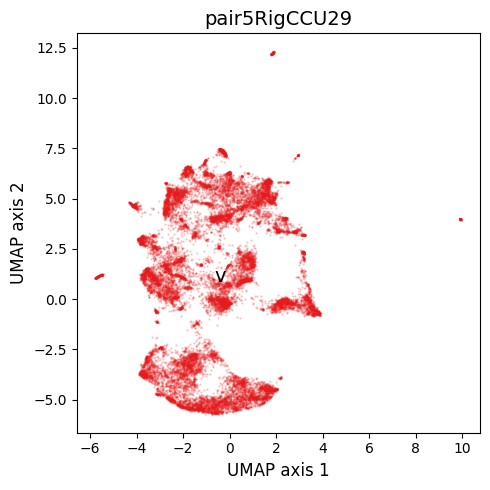

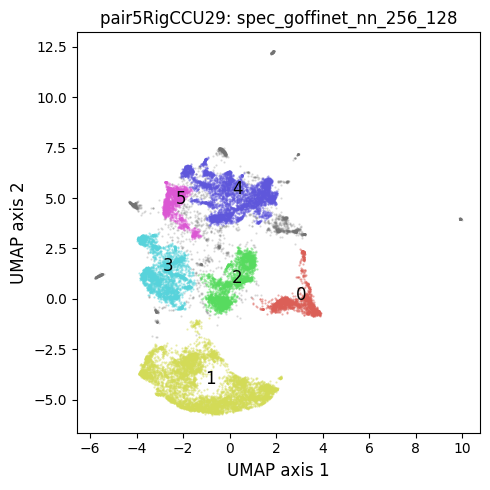

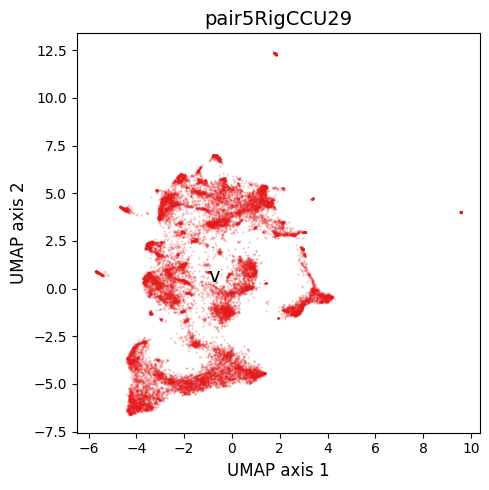

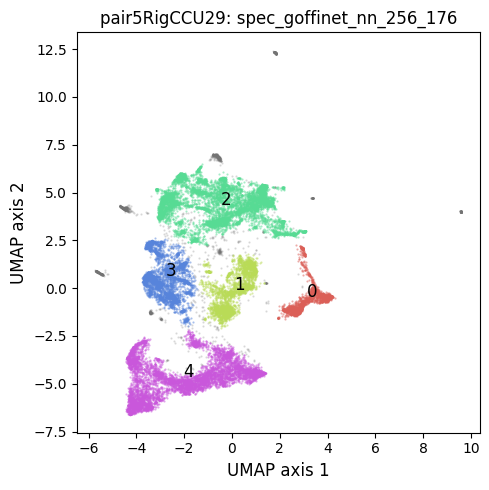

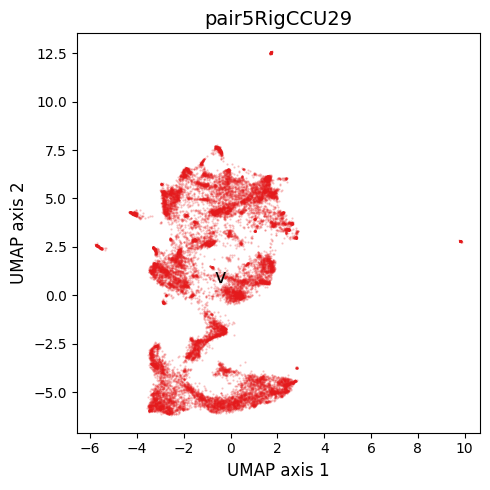

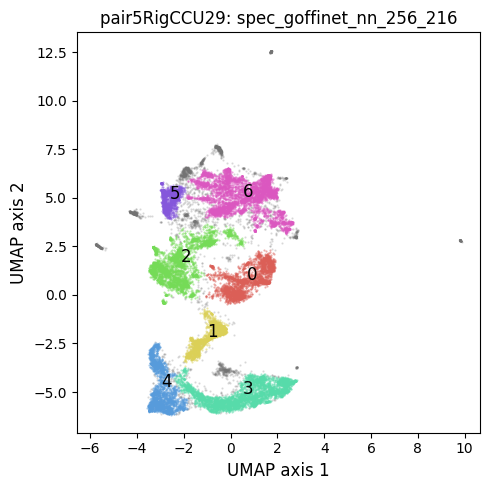

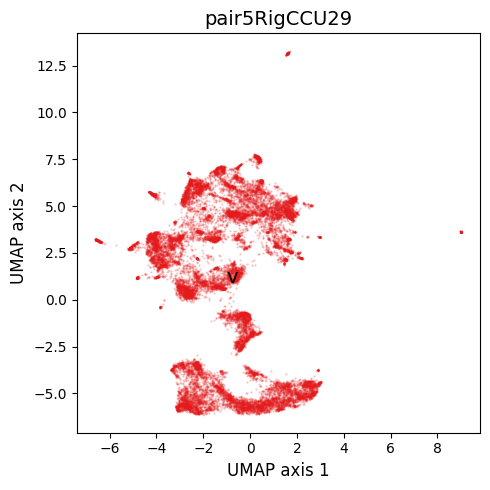

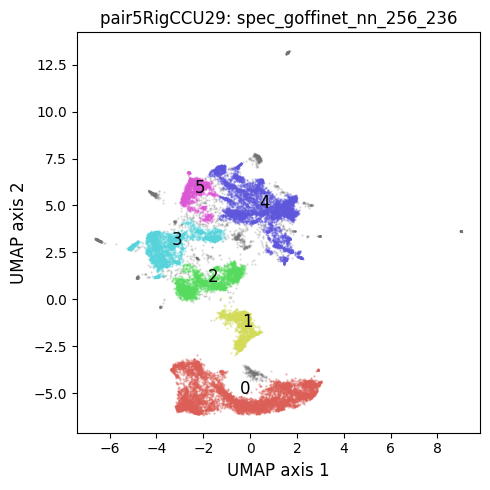

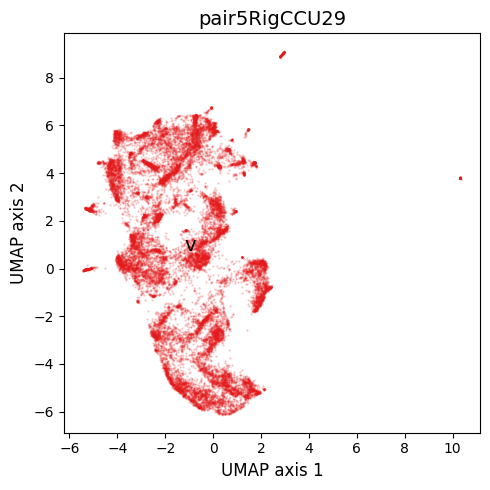

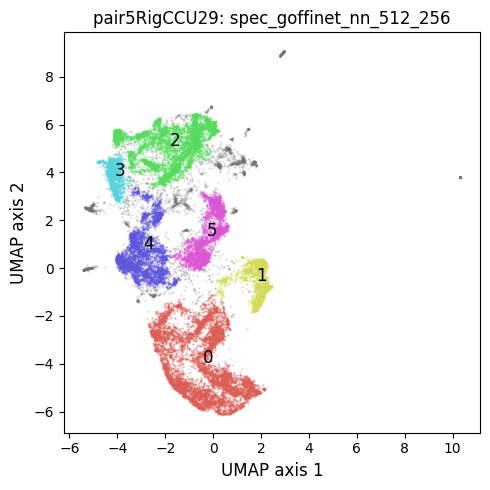

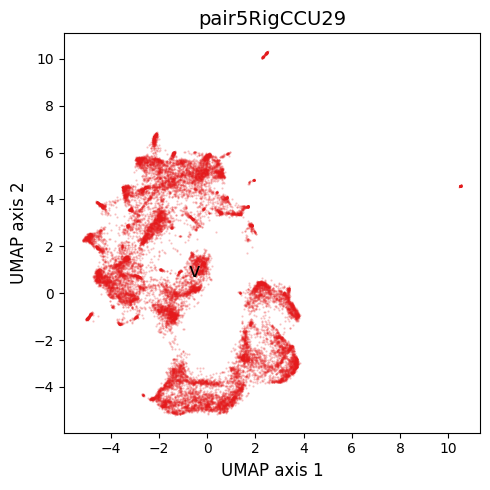

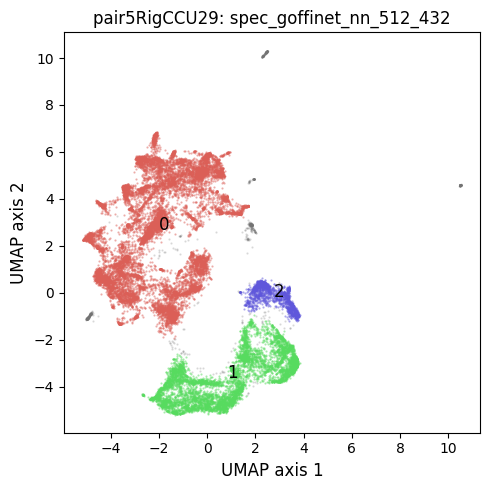

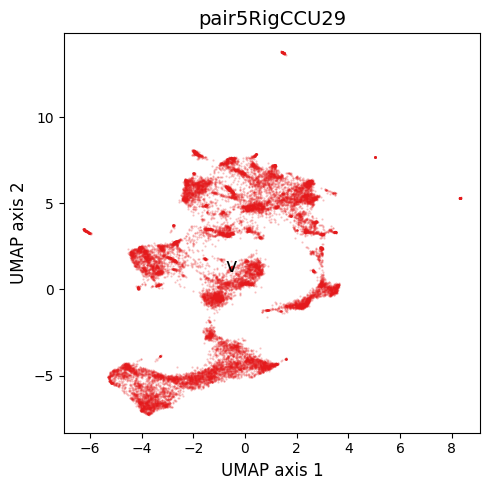

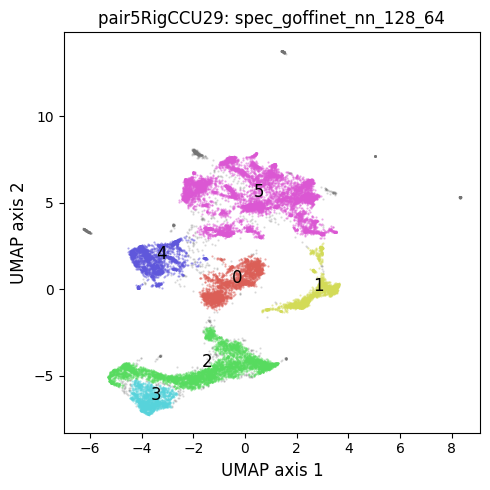

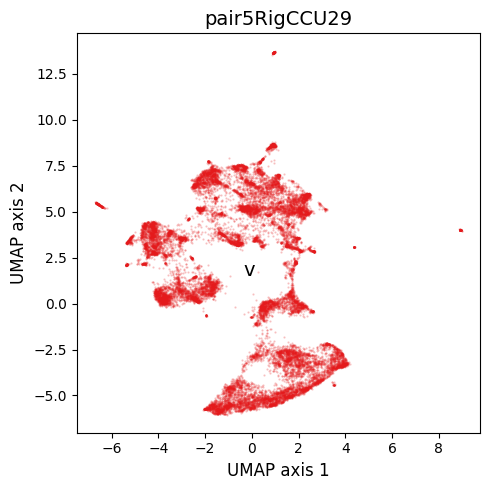

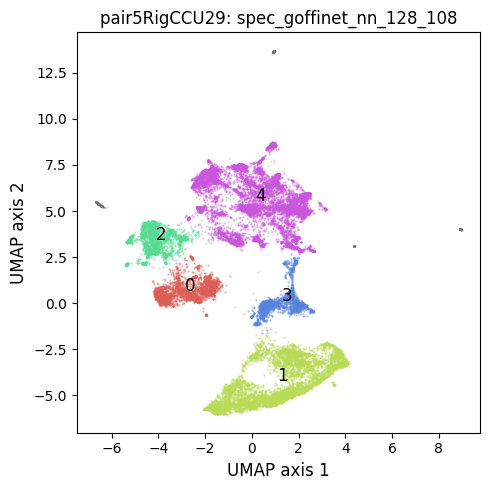

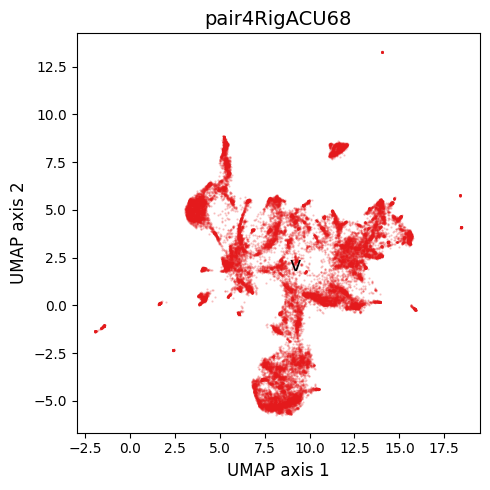

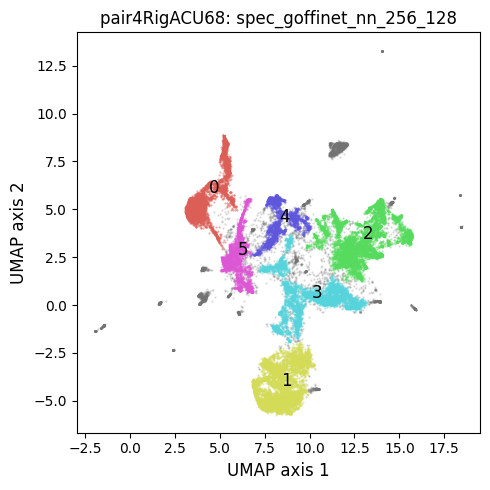

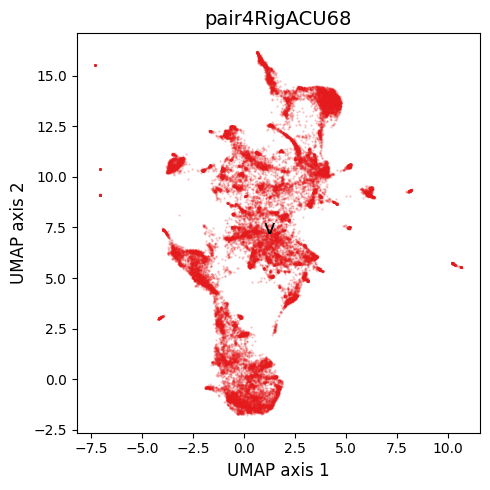

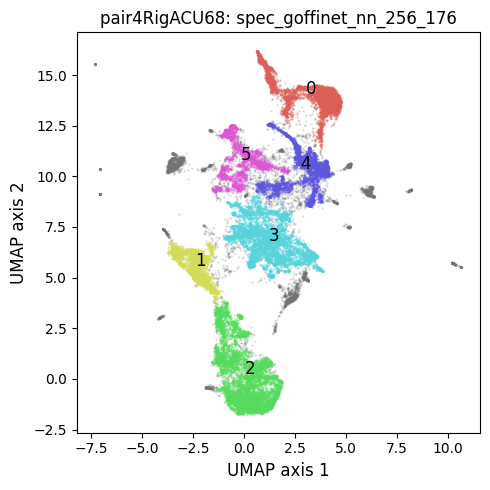

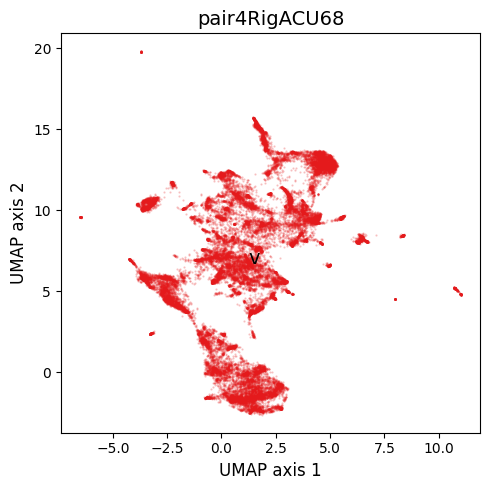

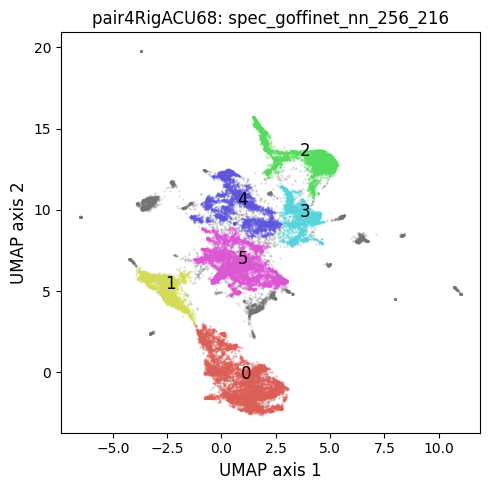

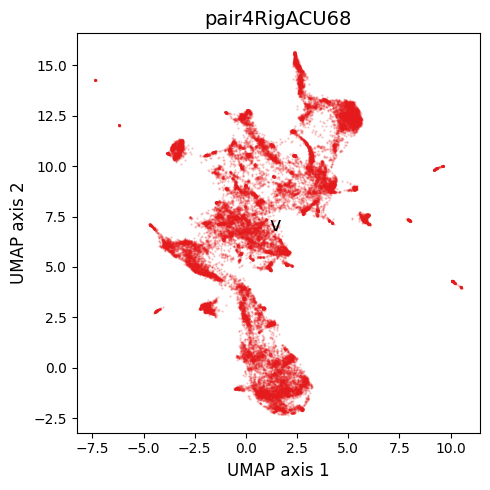

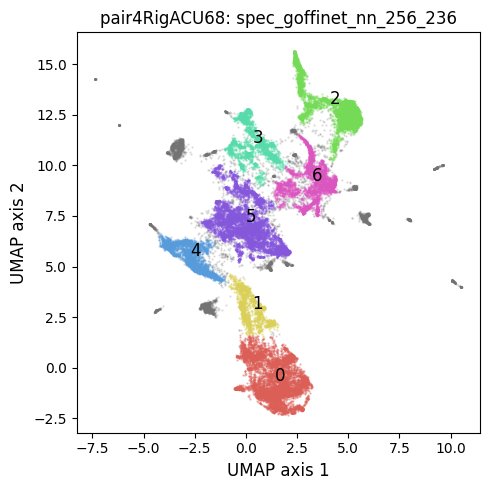

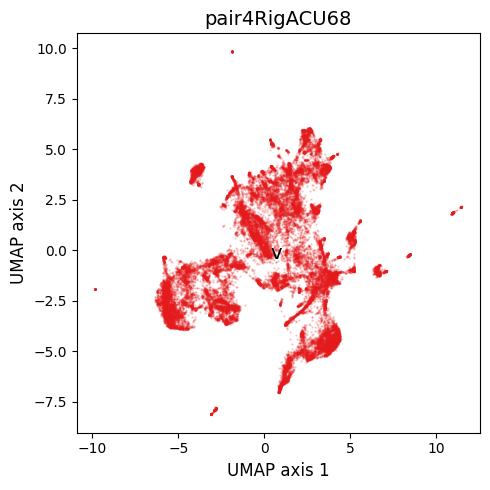

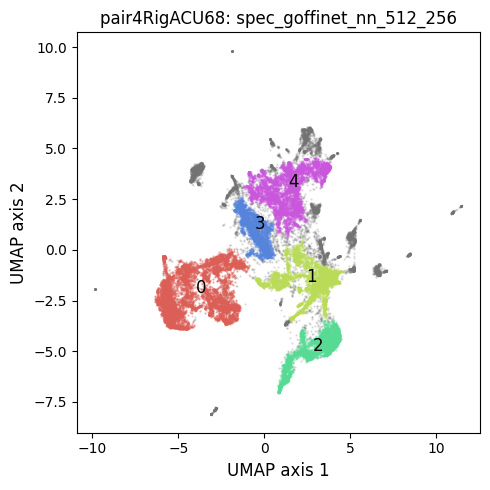

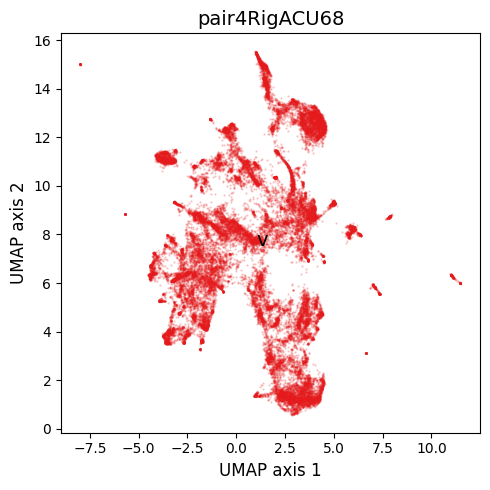

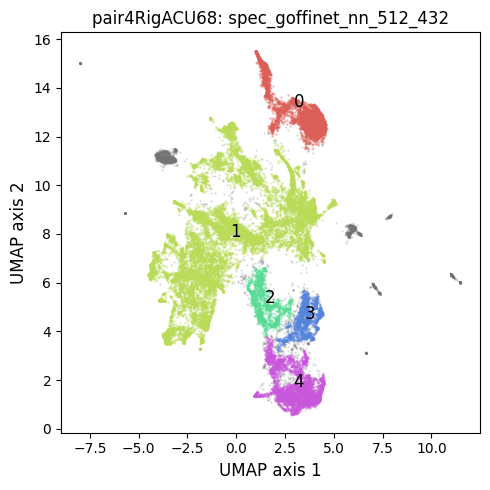

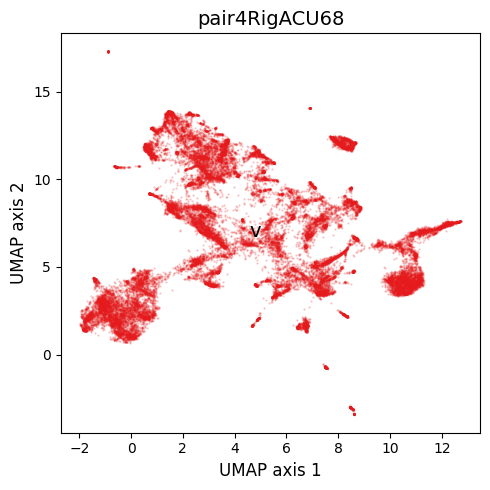

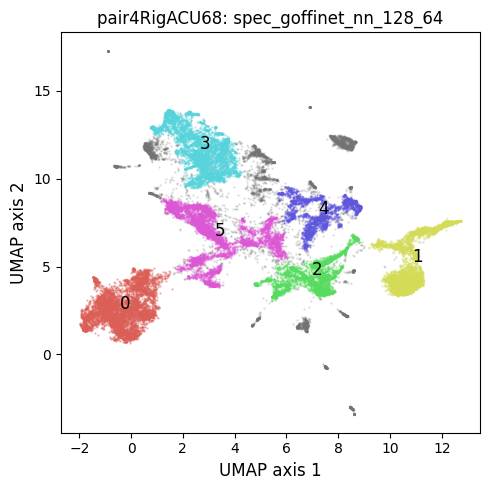

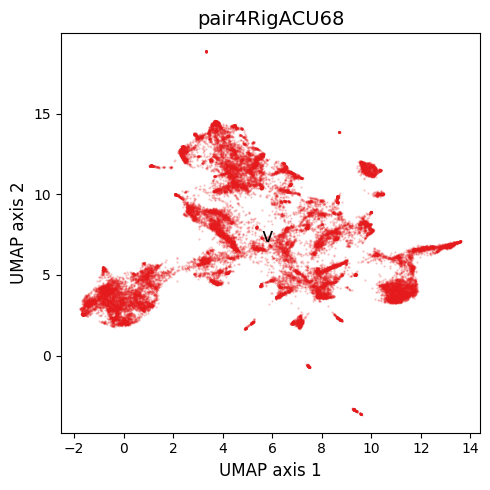

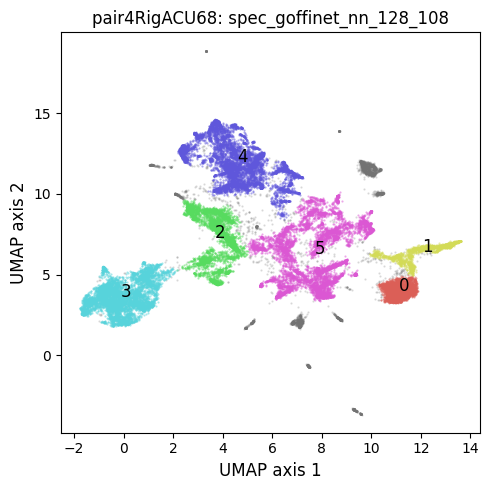

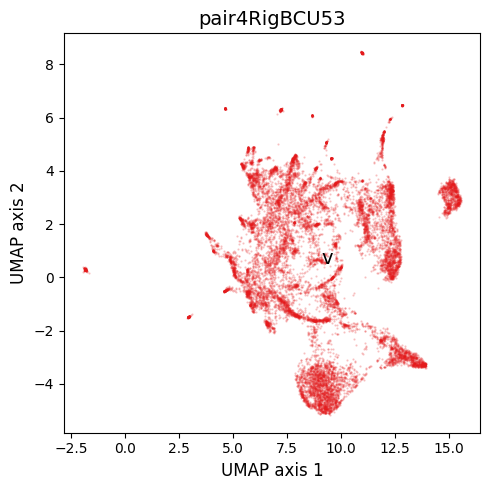

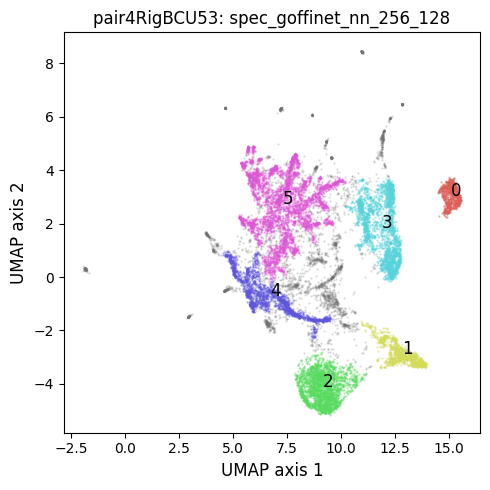

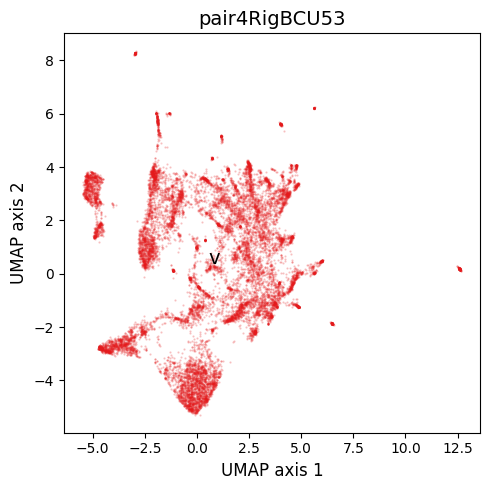

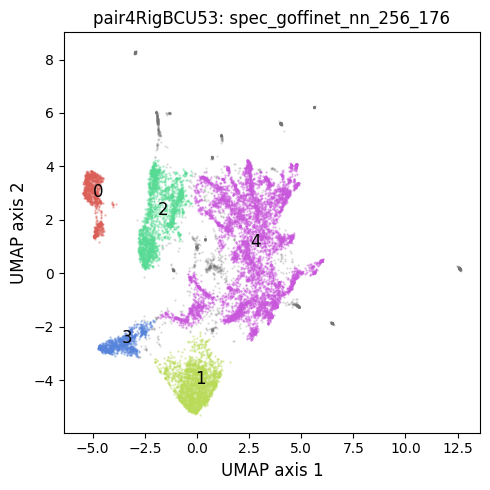

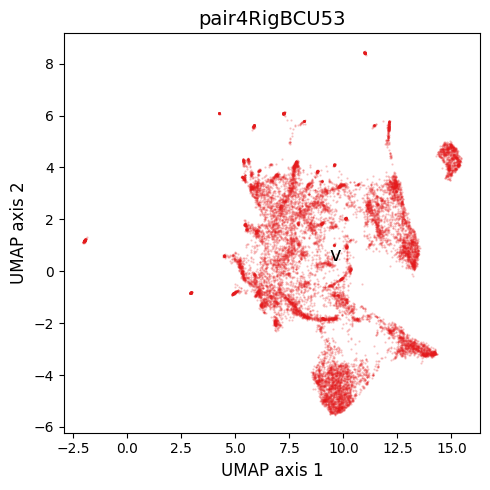

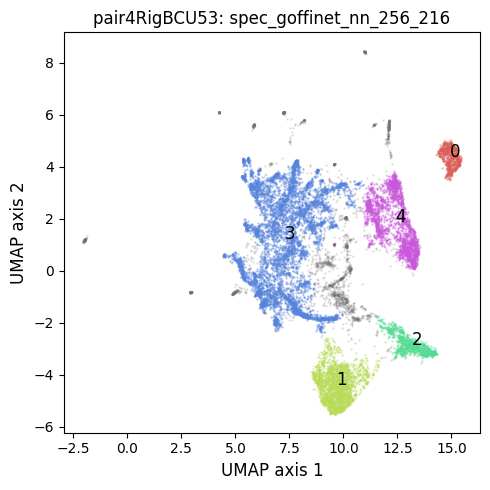

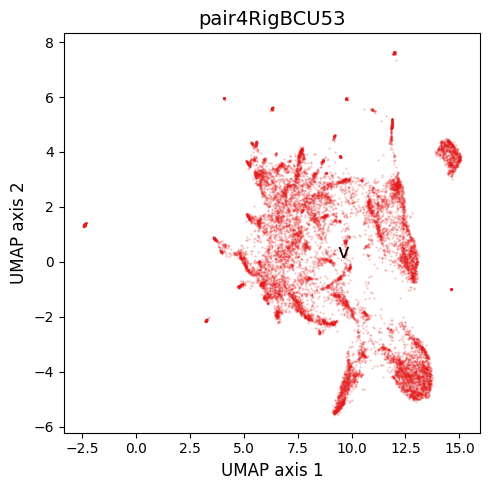

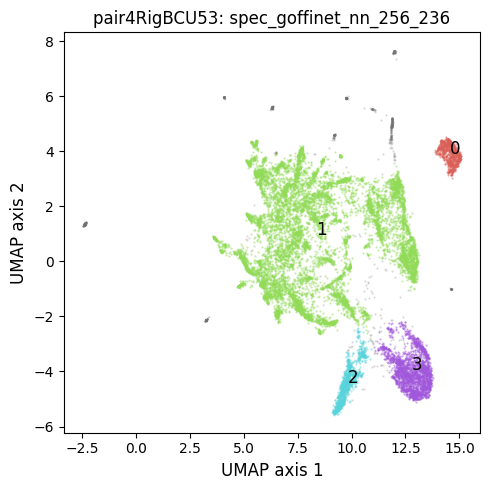

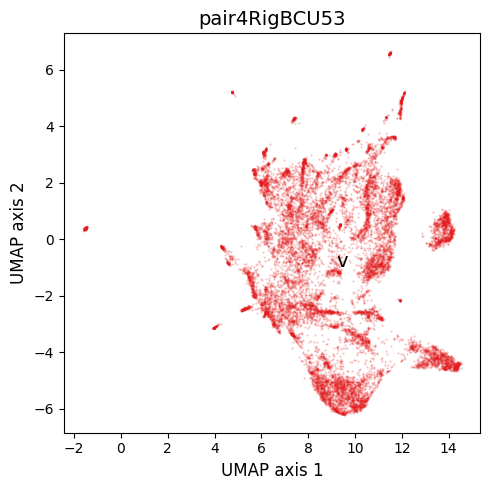

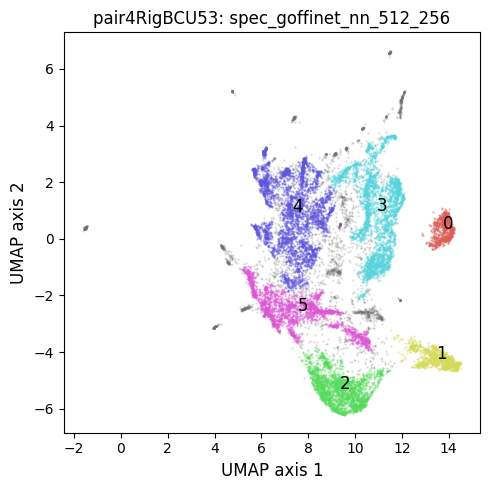

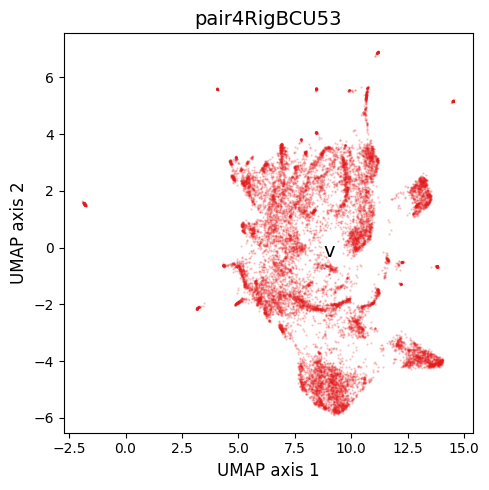

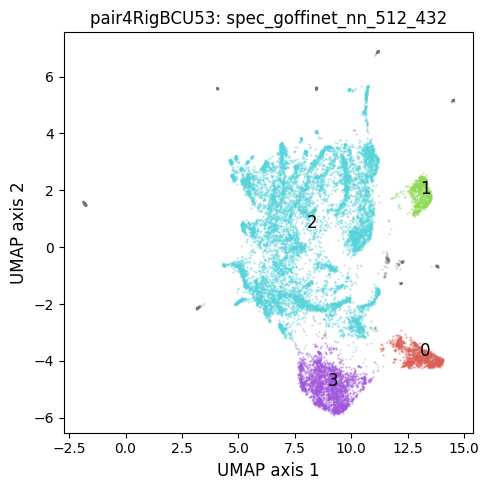

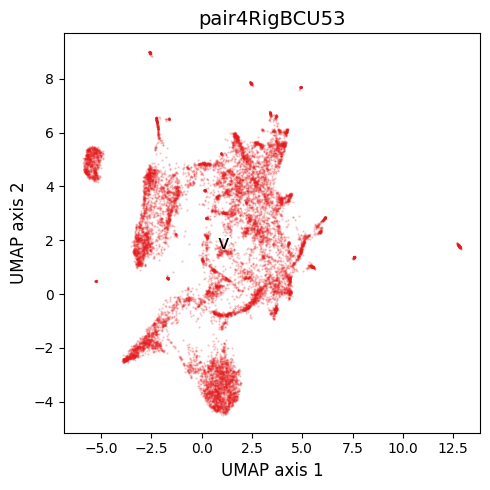

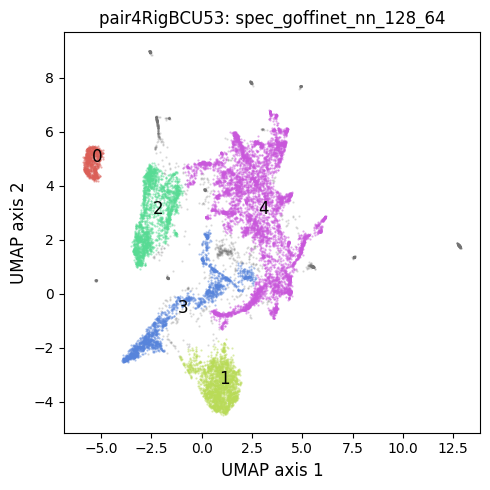

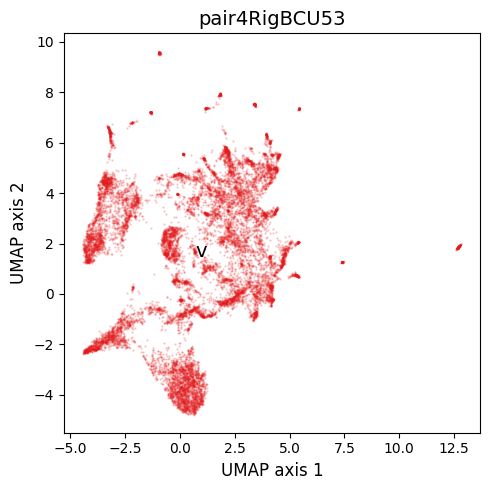

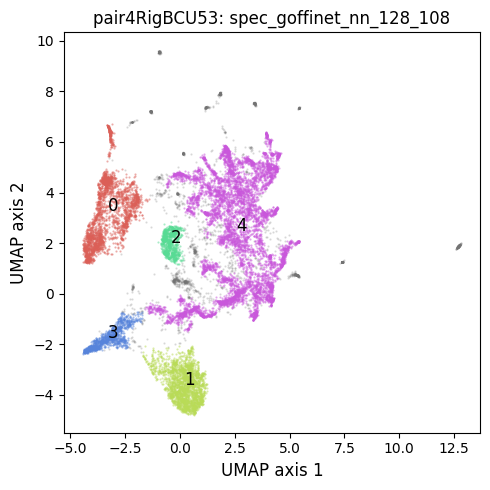

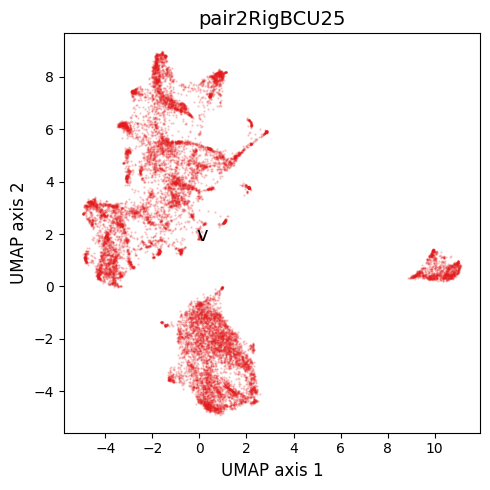

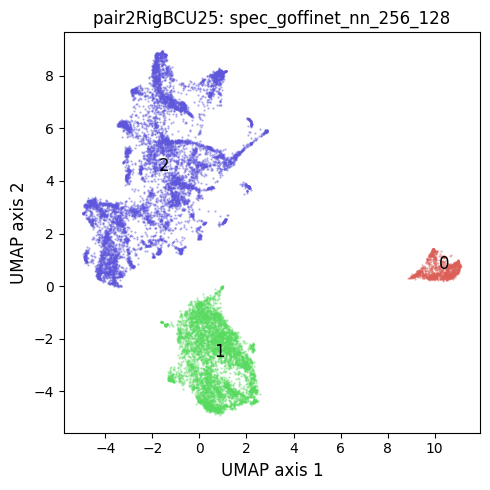

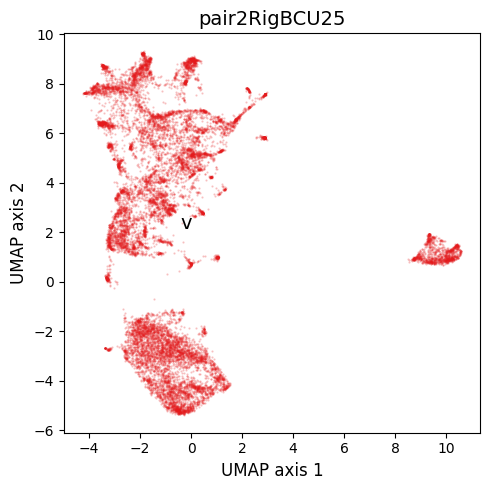

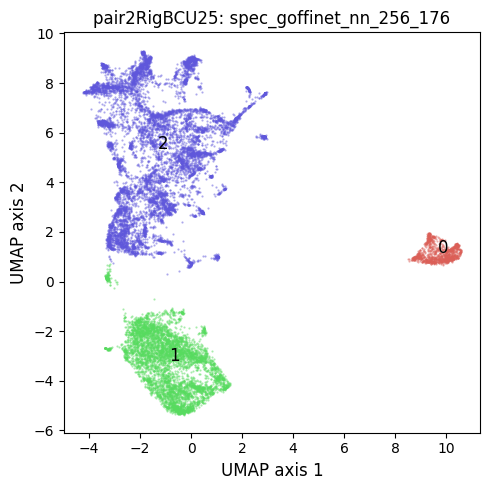

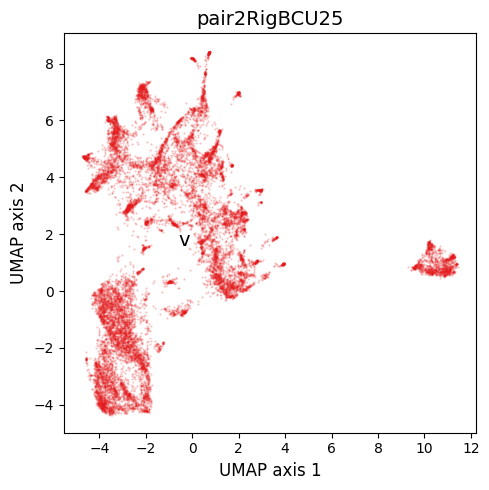

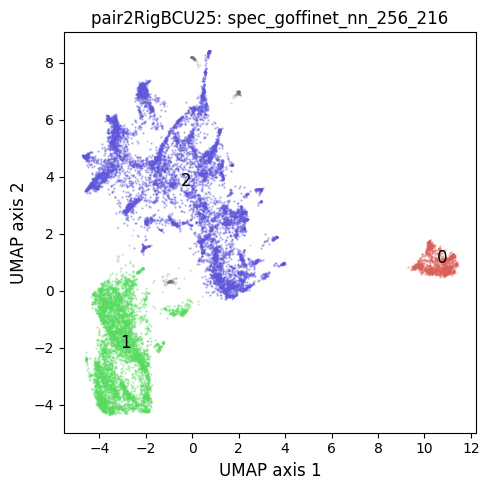

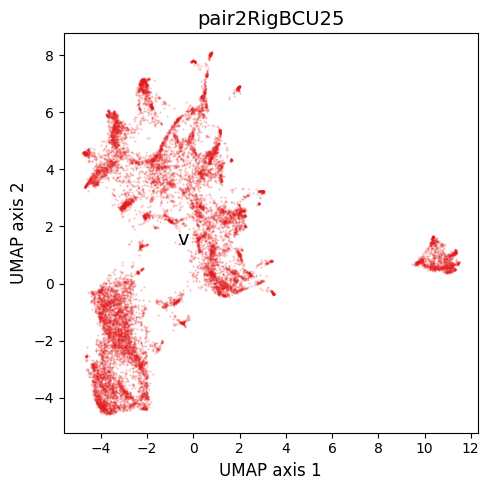

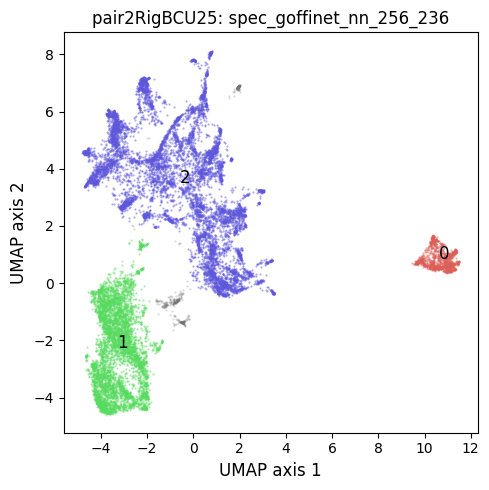

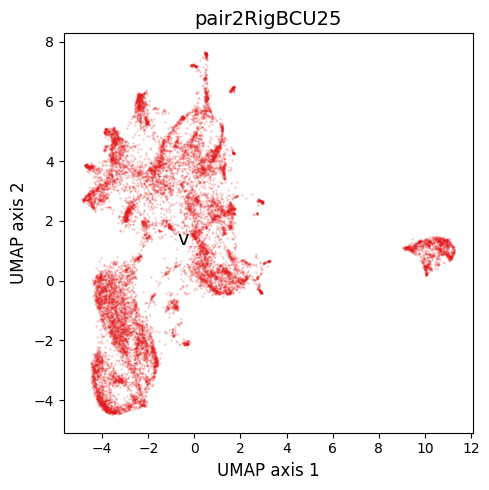

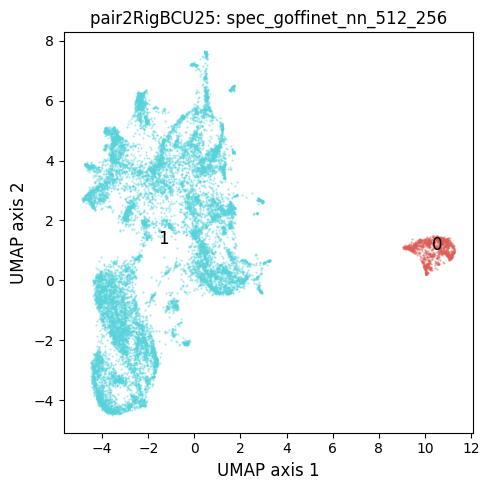

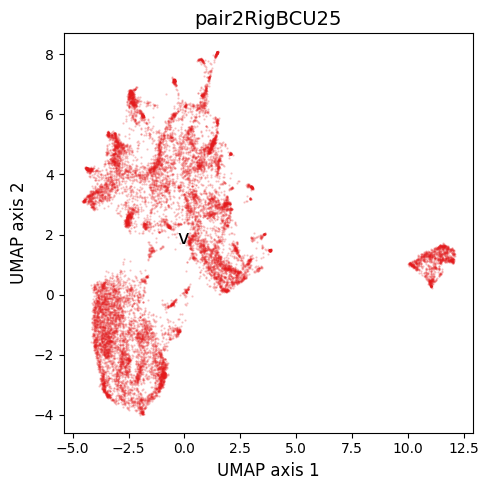

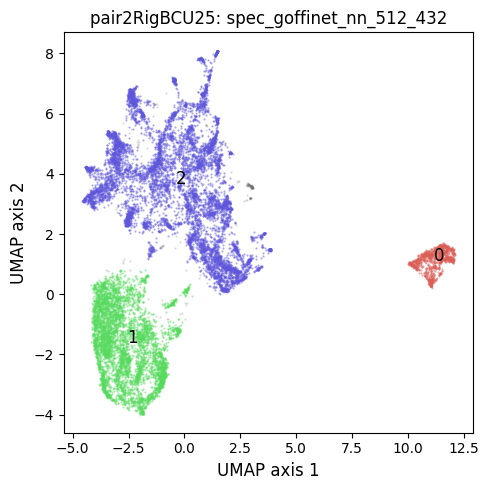

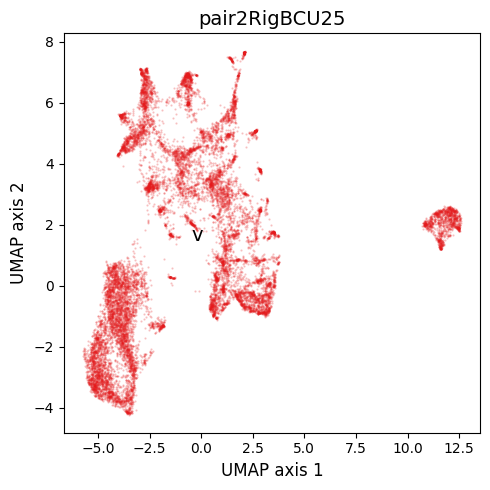

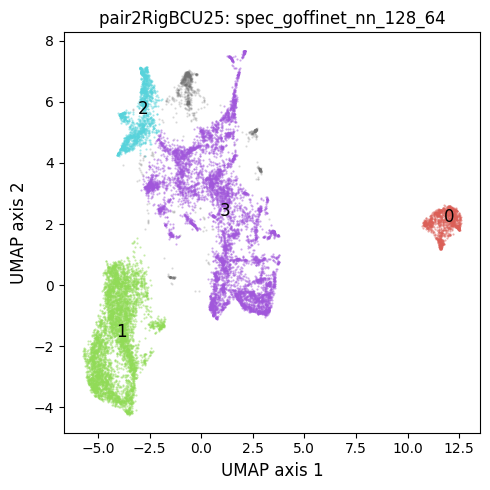

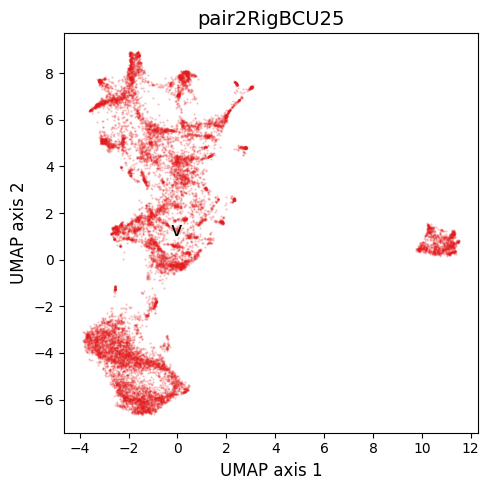

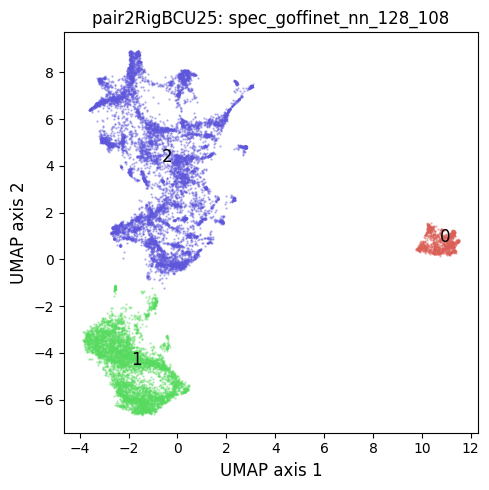

In [16]:
# loop through birds
for bi in range(0, len(birdIDs)):
    bd = birdIDs[bi]
    fd_save = os.path.join(fd_data, bd, 'UMAPonSpec2', sylStr)
    if not os.path.exists(fd_save):
        os.makedirs(fd_save)

    # loop through run names
    # ri = 0 
    for ri in range(len(run_names)):
        rn = run_names[ri]
        print(f'Processing for {bd} {rn}...')
        ## load spectrograms and meta info
        fn_spec = os.path.join(fd_data, bd, 'Spectrogram2', sylStr, f'{bd}.{sylStr}.{rn}.h5')
        fn_info = os.path.join(fd_data, bd, 'Spectrogram2', sylStr, f'{bd}.{sylStr}.{rn}.info.csv')
        with h5py.File(fn_spec, 'r') as f:
            spec_win_all = f['spec_win_all'][:]  #

        info = pd.read_csv(fn_info, index_col=0)

        ## flatten spectrogram
        spec_flat = vae_goffinet.flatten_spectrograms(spec_win_all)
        print(spec_win_all.shape, info.shape, spec_flat.shape)

        ## run UMAP 
        print(param_umap)
        umap_model = umap.UMAP(n_neighbors=param_umap['n_neighbors'], n_components=param_umap['n_components'], min_dist=param_umap['min_dist'], 
                                                      metric=param_umap['metric'], random_state=1118, verbose=True)
        res = umap_model.fit_transform(spec_flat)

        # add UMAP embedding to the dataframe
        embed = info.copy()
        for jj in range(res.shape[1]):
            embed[f'umap{jj+1}'] = res[:,jj]

        ## plot embedding
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])
        for si, ss in enumerate(syl):
            embed_s = embed[embed['label']==ss]
            ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.25, c=col_list[si])
            # add syl label
            ax.text(np.mean(embed_s['umap1']), np.mean(embed_s['umap2']), ss, fontsize=14)
        ax.set_title(bd, fontsize=14)
        ax.set_xlabel('UMAP axis 1', fontsize=12)
        ax.set_ylabel('UMAP axis 2', fontsize=12)
        plt.tight_layout()
        # save fig
        fn_fig =os.path.join(fd_save, f'{bd}.UMAPonSpec.{rn}.embedding.pdf')
        fig.savefig(fn_fig)

        ## HDBSCAN clustering
        clusterer = hdbscan.HDBSCAN(min_cluster_size=int(res.shape[0]* param_hdbscan['min_cluster_size_frac']), min_samples=param_hdbscan['min_samples'])
        clusterer.fit(res)
        embed['hdbscan_cluster'] = clusterer.labels_
        embed['hdbscan_prob'] = clusterer.probabilities_

        # save embedding and clustering 
        fn_embed = os.path.join(fd_save, f'{bd}.UMAPonSpec.{rn}.embedding.csv')
        embed.to_csv(fn_embed)

        # what's the fraction that's not clustered
        unc_f = embed[embed['hdbscan_cluster']==-1].shape[0] / embed.shape[0]
        print(f'The fraction that are not clustered: {unc_f:.4f}')
        num_c = max(embed['hdbscan_cluster']+1)
        print(f'Total number of clusters: {num_c}')

        # color calls according to hdbscan labels
        col_long = sns.color_palette('hls', n_colors=max(embed['hdbscan_cluster'])+1)
        # plot embedding
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])
        for hi in range(-1, max(embed['hdbscan_cluster'])+1):
            embed_s = embed[embed['hdbscan_cluster']==hi]
            if hi==-1:
                ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.25, color='#737373')
            else:
                ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.5, color=col_long[hi])
                # add syl label
                ax.text(np.mean(embed_s['umap1']), np.mean(embed_s['umap2']), hi, fontsize=12)
        ax.set_title(f'{bd}: {rn}', fontsize=12)
        ax.set_xlabel('UMAP axis 1', fontsize=12)
        ax.set_ylabel('UMAP axis 2', fontsize=12)
        plt.tight_layout()
        # save fig
        fn_fig = os.path.join(fd_save, f'{bd}.UMAPonSpec.{rn}.HBSCAN.pdf')
        fig.savefig(fn_fig)

        ## Quantify clusterability with Hopkins metrics
        hpk = hopkins.hopkins_statistic(res, m_prop_n=0.1, n_neighbors=1, distribution="uniform_convex_hull")
        print(f'Hopkins metric on UMAP: {hpk:.4f}')

        # Quantify clustering quality with Silhoutte score
        sil = silhouette_score(res, embed['hdbscan_cluster'], random_state=1118, metric='euclidean')
        print(f'Silhouette score on HDBSCAN: {sil:.4f}')

        # save data to the master data frame
        row = pd.DataFrame([{'birdID':bd, 'run_name':rn, 'num_cluster':num_c, 'frac_unclustered':unc_f, 'hopkins':hpk, 
                             'silhouette':sil, 'param_umap':param_umap, 'param_hdbscan':param_hdbscan}])
        metrics = pd.concat([metrics, row], ignore_index=True)

In [18]:
# save the metrics
fn_metric = os.path.join(fd_save, 'UMAPonSpec.metrics.csv')
metrics.to_csv(fn_metric)
metrics

birdID                  run_name  num_cluster  frac_unclustered  \
0   pair5RigCCU29  spec_goffinet_nn_256_128            6          0.106110   
1   pair5RigCCU29  spec_goffinet_nn_256_176            5          0.062565   
2   pair5RigCCU29  spec_goffinet_nn_256_216            7          0.122978   
3   pair5RigCCU29  spec_goffinet_nn_256_236            6          0.095654   
4   pair5RigCCU29  spec_goffinet_nn_512_256            6          0.120463   
5   pair5RigCCU29  spec_goffinet_nn_512_432            3          0.030051   
6   pair5RigCCU29   spec_goffinet_nn_128_64            6          0.054905   
7   pair5RigCCU29  spec_goffinet_nn_128_108            5          0.022246   
8   pair4RigACU68  spec_goffinet_nn_256_128            6          0.141231   
9   pair4RigACU68  spec_goffinet_nn_256_176            6          0.166204   
10  pair4RigACU68  spec_goffinet_nn_256_216            6          0.152975   
11  pair4RigACU68  spec_goffinet_nn_256_236            7          0.162161   
12  pair4RigACU68  spec_goffinet_nn_512_256            5          0.227149   
13  pair4RigACU68  spec_goffinet_nn_512_432            5          0.084225   
14  pair4RigACU68   spec_goffinet_nn_128_64            6          0.179460   
15  pair4RigACU68  spec_goffinet_nn_128_108            6          0.106274   
16  pair4RigBCU53  spec_goffinet_nn_256_128            6          0.200692   
17  pair4RigBCU53  spec_goffinet_nn_256_176            5          0.099420   
18  pair4RigBCU53  spec_goffinet_nn_256_216            5          0.146659   
19  pair4RigBCU53  spec_goffinet_nn_256_236            4          0.056626   
20  pair4RigBCU53  spec_goffinet_nn_512_256            6          0.170382   
21  pair4RigBCU53  spec_goffinet_nn_512_432            4          0.054097   
22  pair4RigBCU53   spec_goffinet_nn_128_64            5          0.090095   
23  pair4RigBCU53  spec_goffinet_nn_128_108            5          0.114734   
24  pair2RigBCU25  spec_goffinet_nn_256_128            3          0.000000   
25  pair2RigBCU25  spec_goffinet_nn_256_176            3          0.000000   
26  pair2RigBCU25  spec_goffinet_nn_256_216            3          0.018843   
27  pair2RigBCU25  spec_goffinet_nn_256_236            3          0.025468   
28  pair2RigBCU25  spec_goffinet_nn_512_256            2          0.000000   
29  pair2RigBCU25  spec_goffinet_nn_512_432            3          0.010152   
30  pair2RigBCU25   spec_goffinet_nn_128_64            4          0.061148   
31  pair2RigBCU25  spec_goffinet_nn_128_108            3          0.000000   

     hopkins  silhouette                                         param_umap  \
0   0.979619    0.401065  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
1   0.980515    0.440328  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
2   0.983837    0.358224  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
3   0.984974    0.337602  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
4   0.984119    0.355743  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
5   0.983466    0.373300  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
6   0.976629    0.399197  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
7   0.979318    0.472648  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
8   0.980734    0.356515  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
9   0.981240    0.353980  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
10  0.982971    0.384100  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
11  0.982117    0.347581  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
12  0.979982    0.262634  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
13  0.975267    0.192279  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
14  0.976177    0.372718  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
15  0.975094    0.420785  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
16  0.966980    0.361967  {'n_components': 2, 'n_neighbors': 25, 'min_di...   
17  0.971921  

## 3. Plot summary results

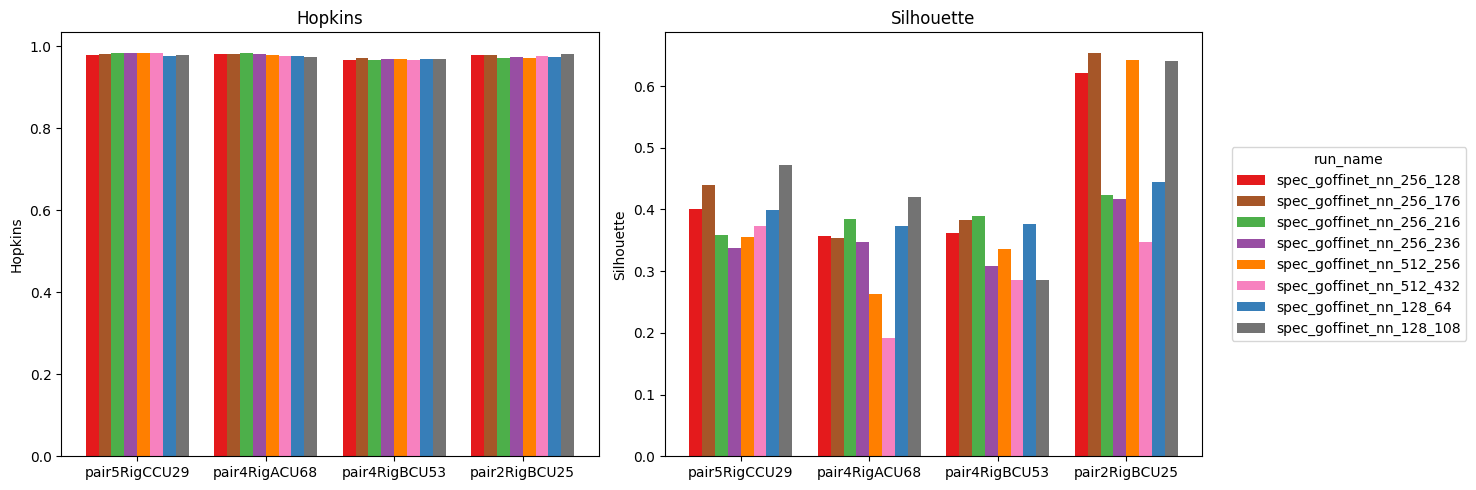

In [19]:
bird_ids = birdIDs
run_name_to_color = {run: col_list[i] for i, run in enumerate(run_names)}

# Setup
fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 0.3]})
metrics_to_plot = ['hopkins', 'silhouette']
width = 0.8 / len(run_names)
x = np.arange(len(bird_ids))

# Plot loop
for ax, metric in zip(axes[:2], metrics_to_plot):
    for i, run in enumerate(run_names):
        vals = [
            metrics.loc[(metrics['birdID'] == bird) & (metrics['run_name'] == run), metric].values[0]
            if not metrics[(metrics['birdID'] == bird) & (metrics['run_name'] == run)].empty else np.nan
            for bird in bird_ids
        ]
        ax.bar(x + i * width, vals, width, label=run, color=run_name_to_color[run])
    ax.set_title(metric.capitalize())
    ax.set_xticks(x + width * (len(run_names) - 1) / 2)
    ax.set_xticklabels(bird_ids)
    ax.set_ylabel(metric.capitalize())

# Legend in third panel
axes[2].axis('off')  # Hide axis
handles, labels = axes[0].get_legend_handles_labels()
axes[2].legend(handles, labels, title='run_name', loc='center')

plt.tight_layout()
plt.show()

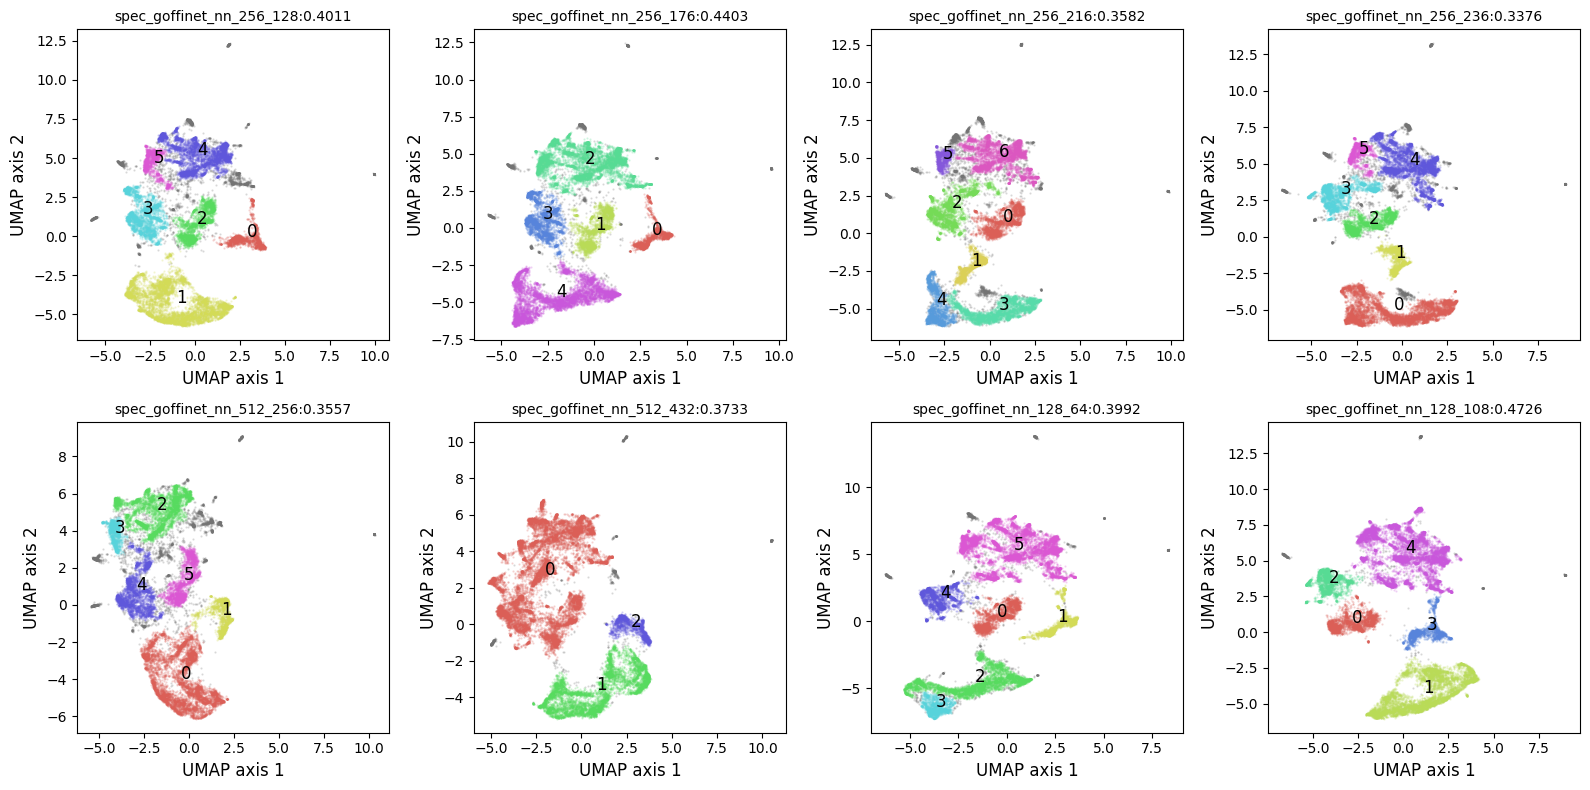

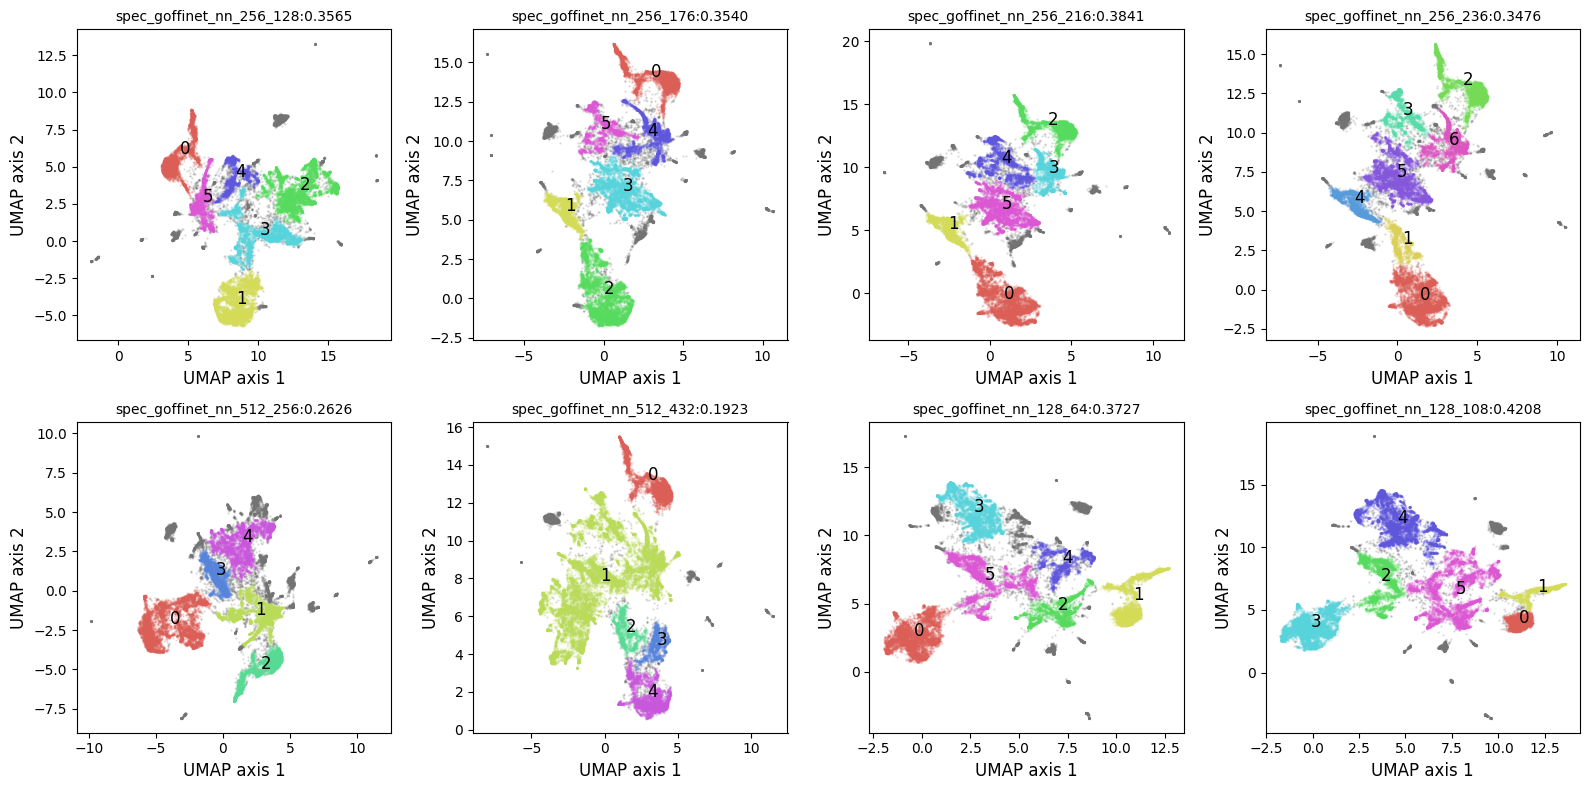

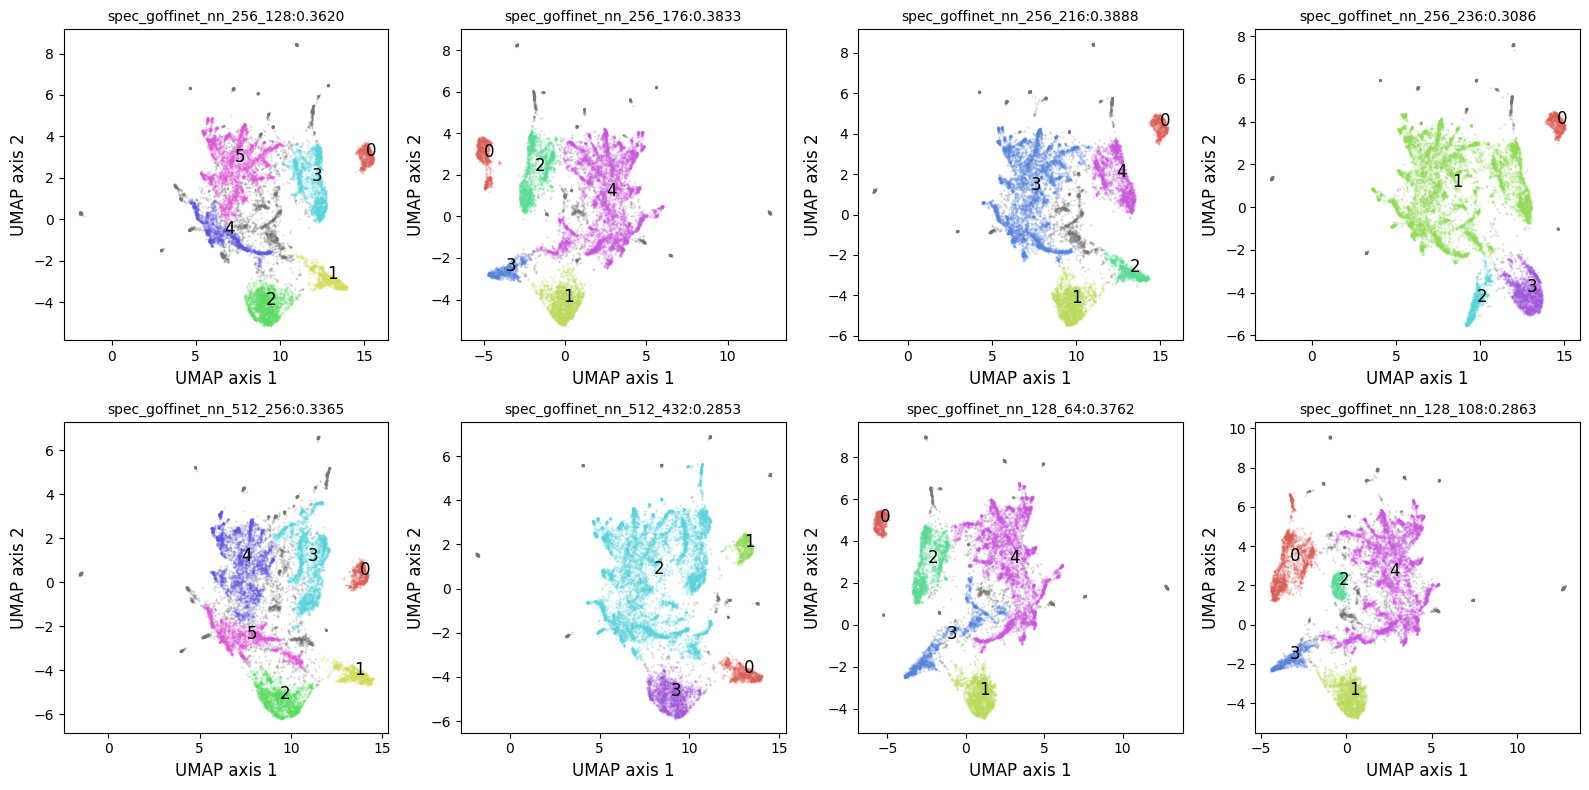

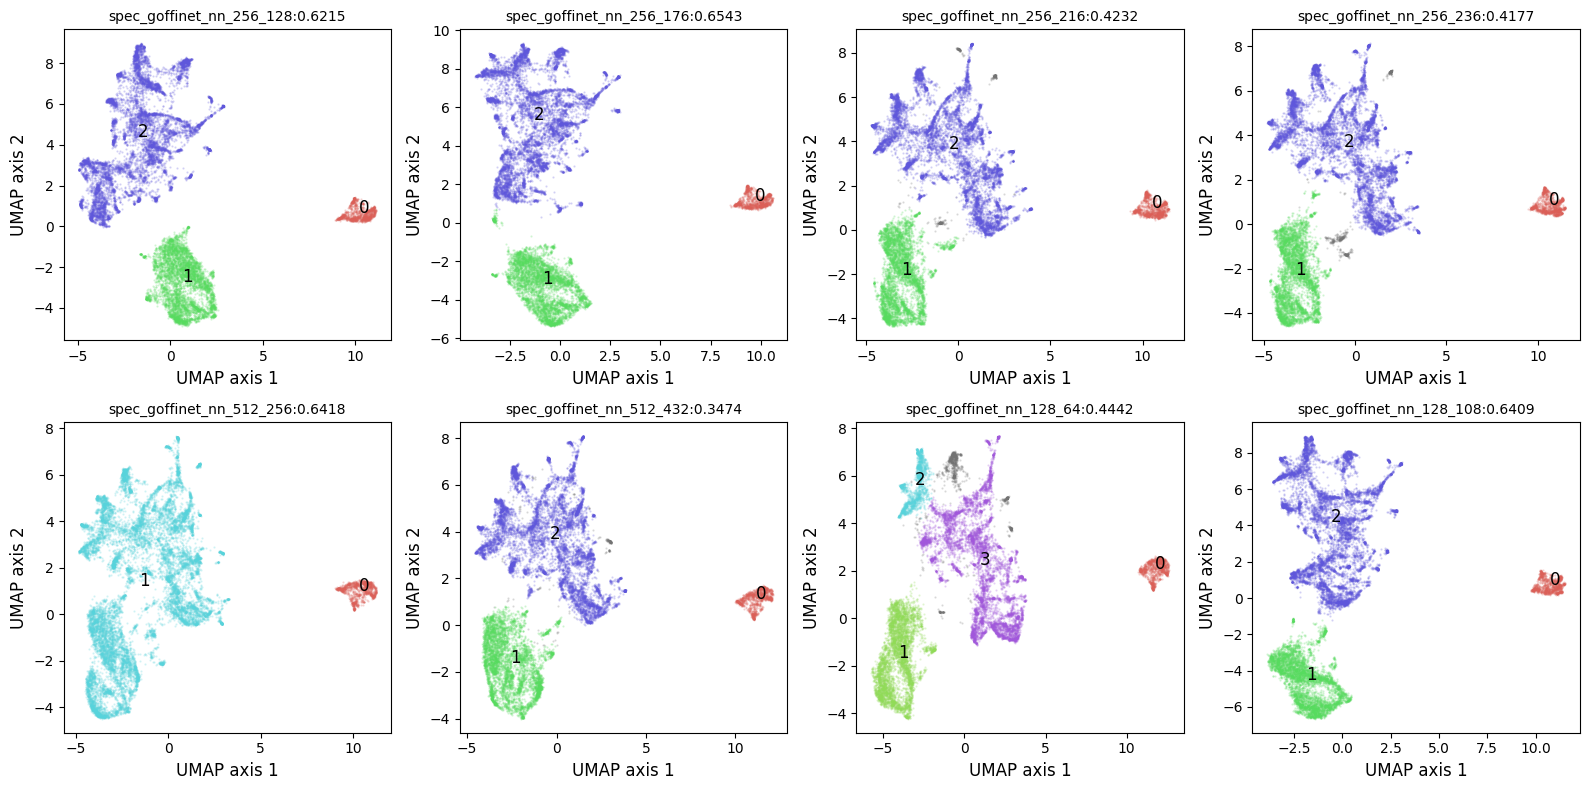

In [20]:
# Combine the HDBSCAN clustering plot
# bi = 0
for bi in range(len(birdIDs)):
    bd = birdIDs[bi]
    # one figure for each bird
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=[16, 8])

    for ri in range(len(run_names)):
        rn = run_names[ri]
        fd_save = os.path.join(fd_data, bd, 'UMAPonSpec2', sylStr)
        fn_embed = os.path.join(fd_save, f'{bd}.UMAPonSpec.{rn}.embedding.csv')
        embed = pd.read_csv(fn_embed, index_col=0)

        plot_i = ri//4
        plot_j = ri%4
        ax = axes[plot_i][plot_j]
        # color calls according to hdbscan labels
        col_long = sns.color_palette('hls', n_colors=max(embed['hdbscan_cluster'])+1)
        # plot embedding
        for hi in range(-1, max(embed['hdbscan_cluster'])+1):
            embed_s = embed[embed['hdbscan_cluster']==hi]
            if hi==-1:
                ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.25, color='#737373')
            else:
                ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.25, color=col_long[hi])
                # add syl label
                ax.text(np.mean(embed_s['umap1']), np.mean(embed_s['umap2']), hi, fontsize=12)
        sil = metrics.loc[(metrics['birdID'] == bd) & (metrics['run_name'] == rn), 'silhouette'].iloc[0]
        ax.set_title(f'{rn}:{sil:.4f}', fontsize=10)
        ax.set_xlabel('UMAP axis 1', fontsize=12)
        ax.set_ylabel('UMAP axis 2', fontsize=12)
    plt.tight_layout()
    # save plot
    fn_fig = os.path.join(fd_save, f'{bd}.HDBSCANcomb.pdf')
    fig.savefig(fn_fig)

### how many calls in total per bird?

In [23]:
for bi in range(len(birdIDs)):
    bd = birdIDs[bi]
    rn = run_names[0]
    fd_save = os.path.join(fd_data, bd, 'UMAPonSpec2', sylStr)
    fn_embed = os.path.join(fd_save, f'{bd}.UMAPonSpec.{rn}.embedding.csv')
    embed = pd.read_csv(fn_embed, index_col=0)
    print(f'{bd}: {embed.shape[0]}')

pair5RigCCU29: 23240
pair4RigACU68: 36359
pair4RigBCU53: 16194
pair2RigBCU25: 16452
